# EEG Signal Classification for Seizure Detection

This notebook explores the use of machine learning to classify EEG signals for seizure detection. We will be working with a dataset containing EEG recordings from 80 individuals, categorized into four classes: seizure events, focal seizures, generalized seizures, and healthy subjects.

The goal of this project is to build and evaluate different classification models to accurately identify the different types of EEG signals.

# Single-Stage Classification Models

## Load the data

### Subtask:
Load the EEG dataset from the CSV file into a pandas DataFrame.


In [ ]:
import pandas as pd
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/beed_+bangalore+eeg+epilepsy+dataset.zip', 'r') as zip_ref:
    # Extract all the contents of zip file in current directory
    zip_ref.extractall('/content/')

# Load the EEG dataset
df = pd.read_csv('/content/BEED_Data.csv')

# Display the first few rows of the DataFrame
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
1,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
2,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
3,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0
4,-67,-90,-97,-94,-86,-71,-43,-11,23,46,58,50,39,19,-9,-41,0


In [ ]:
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/beed_+bangalore+eeg+epilepsy+dataset.zip', 'r') as zip_ref:
    # Print all the contents of zip file
    zip_ref.printdir()

File Name                                             Modified             Size
BEED_Data.csv                                  2025-03-11 05:52:46       404412


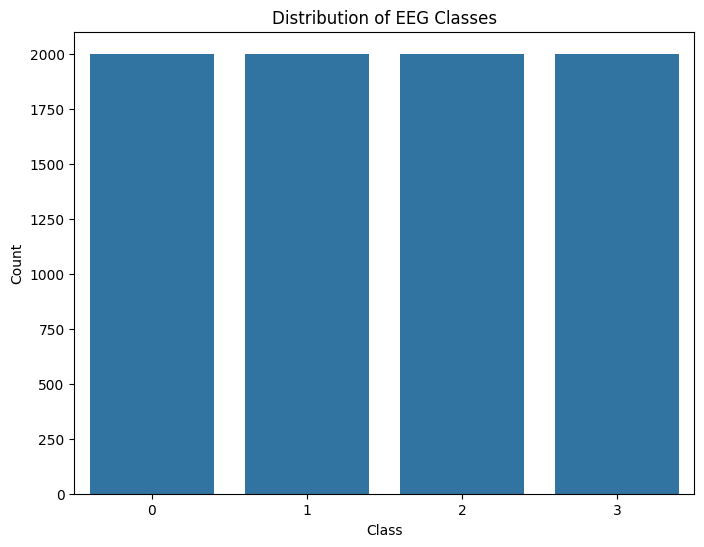

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable 'y'
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribution of EEG Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

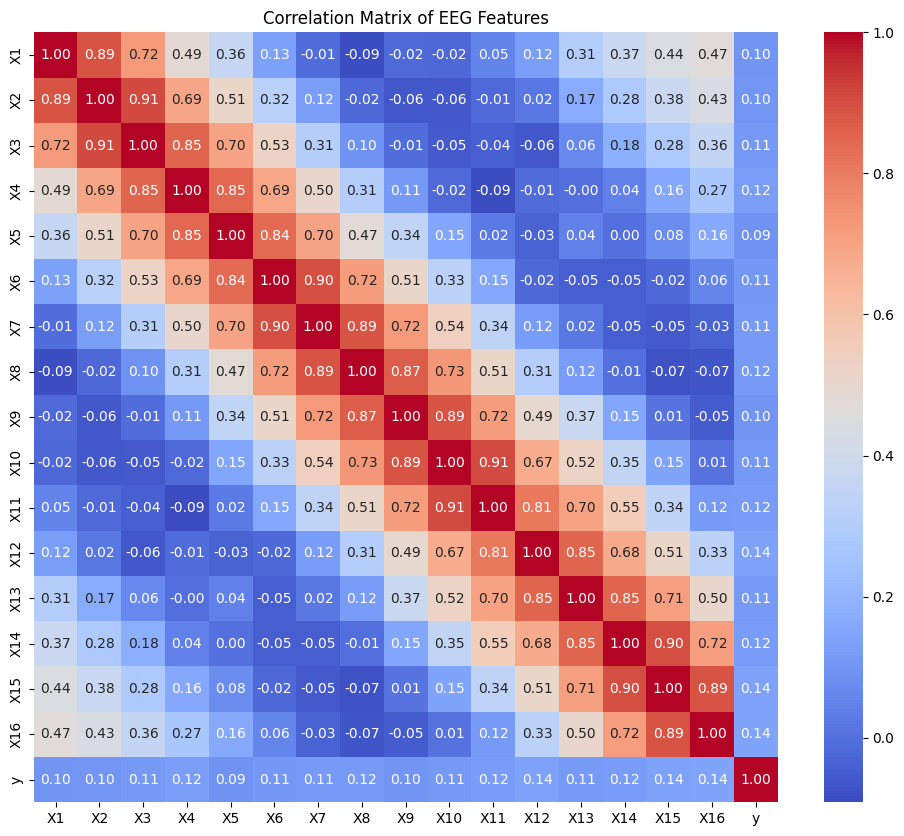

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of EEG Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train the models
log_reg.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Logistic Regression Evaluation:
Accuracy: 0.454375
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       400
           1       0.49      0.59      0.54       400
           2       0.36      0.38      0.37       400
           3       0.31      0.34      0.32       400

    accuracy                           0.45      1600
   macro avg       0.48      0.45      0.46      1600
weighted avg       0.48      0.45      0.46      1600


SVM Evaluation:
Accuracy: 0.744375
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       400
           1       0.81      0.71      0.76       400
           2       0.57      0.93      0.70       400
           3       0.72      0.35      0.47       400

    accuracy                           0.74      1600
   macro avg       0.77      0.74      0.73      1600
weighted avg       0.77      0.74      0.73      1600


Random Forest Evaluation:
Accuracy: 0.9612

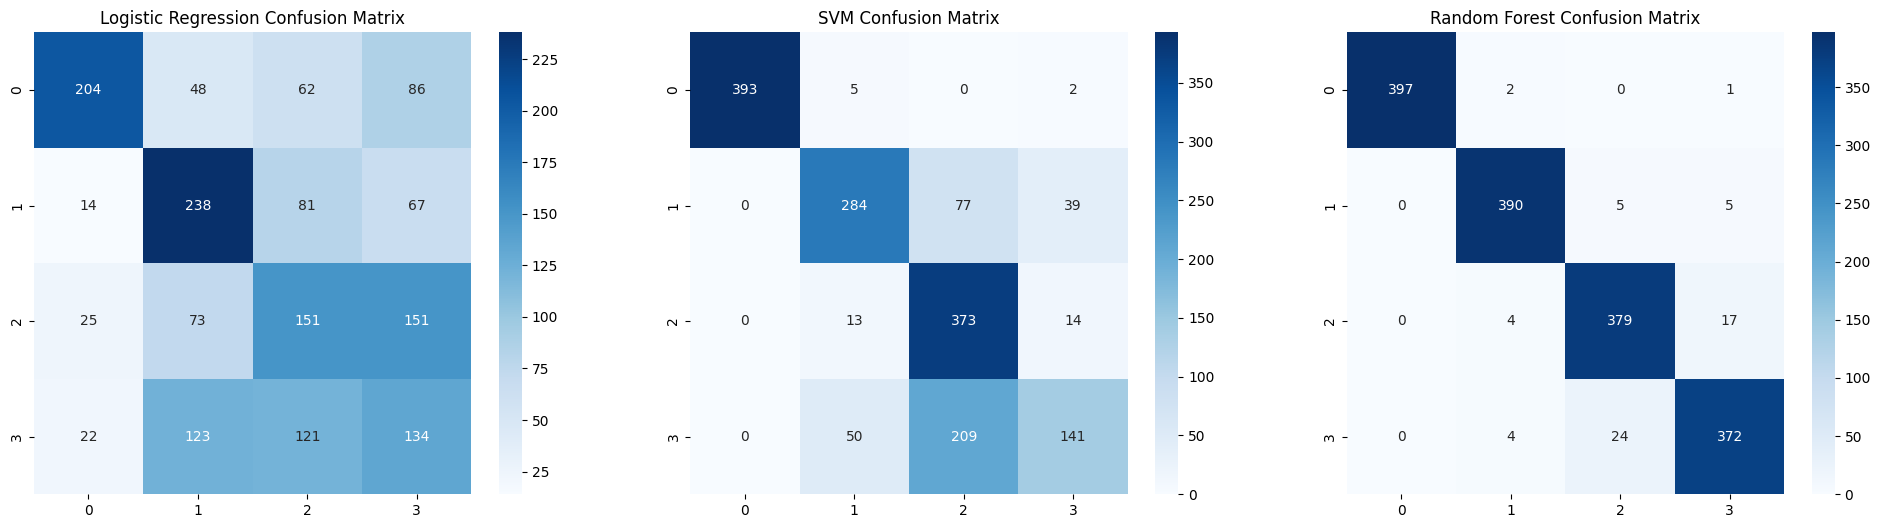

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
log_reg_pred = log_reg.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)

# Evaluate the models
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred)}")
print(classification_report(y_test, log_reg_pred))

print("\nSVM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(classification_report(y_test, svm_pred))

print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Random Forest Confusion Matrix')
plt.show()

# Two-Stage Classification Model with Feature Engineering

In this section, we explore a more complex, two-stage classification model. The pipeline for this model is as follows:

1.  **Feature Engineering**: Extract FFT band-power features from the EEG signals.
2.  **Dimensionality Reduction**: Use UMAP to reduce the dimensionality of the features.
3.  **AdaBoost Model**: Train an AdaBoost classifier on the UMAP embeddings.
4.  **LSTM Meta-Model**: Use the probability scores from the AdaBoost model to train an LSTM meta-model for the final classification.

## Feature engineering

### Subtask:
Extract FFT band-power features from the EEG signals for each epoch.


**Reasoning**:
The subtask requires extracting FFT band-power features from the EEG signals. This involves defining a function to compute PSD and band powers for each epoch and applying it to the DataFrame `X`.



In [ ]:
import numpy as np
from scipy.fft import fft

def extract_band_powers(eeg_epoch, sf=100):
    """
    Extracts FFT band-power features from a single EEG epoch.

    Args:
        eeg_epoch (pd.Series): A single row of the DataFrame representing an EEG epoch.
        sf (int): Sampling frequency of the EEG data (default is 100 based on common EEG datasets,
                  but the dataset description does not specify; assuming 100).

    Returns:
        list: A list of band powers for Delta, Theta, Alpha, Beta, and Gamma bands.
    """
    n_samples = len(eeg_epoch)
    # Calculate the FFT
    fft_values = fft(eeg_epoch)
    # Calculate the power spectrum
    psd = np.abs(fft_values)**2 / (n_samples * sf)
    freqs = np.fft.fftfreq(n_samples, 1/sf)

    # Define frequency bands
    bands = {'Delta': (0.5, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)} # Using a common upper limit for Gamma

    band_powers = []
    # Calculate average power for each band
    for band, (low, high) in bands.items():
        freq_mask = np.where((freqs >= low) & (freqs <= high))[0]
        band_power = np.mean(psd[freq_mask]) if len(freq_mask) > 0 else 0
        band_powers.append(band_power)

    return band_powers

# Apply the function to each row of the DataFrame X
# It's more efficient to apply to the numpy array of X
X_band_powers = np.array([extract_band_powers(row) for index, row in X.iterrows()])

# Create a new DataFrame for band-power features
band_power_df = pd.DataFrame(X_band_powers, columns=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])

# Display the first few rows of the new DataFrame
display(band_power_df.head())

,Delta,Theta,Alpha,Beta,Gamma
0,0.0,8.704165,0.0,3.941817,0.281378
1,0.0,452.761032,0.0,11.342086,0.855904
2,0.0,44.378300,0.0,18.339232,2.880918
3,0.0,117.291815,0.0,23.876174,4.410513
4,0.0,242.403003,0.0,0.253500,0.021332


In [ ]:
import numpy as np
from scipy.fft import fft

def extract_band_powers(eeg_epoch, sf=100):
    """
    Extracts FFT band-power features from a single EEG epoch.

    Args:
        eeg_epoch (pd.Series): A single row of the DataFrame representing an EEG epoch.
        sf (int): Sampling frequency of the EEG data (default is 100 based on common EEG datasets,
                  but the dataset description does not specify; assuming 100).

    Returns:
        list: A list of band powers for Delta, Theta, Alpha, Beta, and Gamma bands.
    """
    n_samples = len(eeg_epoch)
    # Calculate the FFT
    fft_values = fft(eeg_epoch)
    # Calculate the power spectrum
    psd = np.abs(fft_values)**2 / (n_samples * sf)
    freqs = np.fft.fftfreq(n_samples, 1/sf)

    # Define frequency bands
    bands = {'Delta': (0.5, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)} # Using a common upper limit for Gamma

    band_powers = []
    # Calculate average power for each band
    for band, (low, high) in bands.items():
        freq_mask = np.where((freqs >= low) & (freqs <= high))[0]
        band_power = np.mean(psd[freq_mask]) if len(freq_mask) > 0 else 0
        band_powers.append(band_power)

    return band_powers

# Apply the function to each row of the DataFrame X
# It's more efficient to apply to the numpy array of X
X_band_powers = np.array([extract_band_powers(row) for index, row in X.iterrows()])

# Create a new DataFrame for band-power features
band_power_df = pd.DataFrame(X_band_powers, columns=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])

# Display the first few rows of the new DataFrame
display(band_power_df.head())

,Delta,Theta,Alpha,Beta,Gamma
0,0.0,8.704165,0.0,3.941817,0.281378
1,0.0,452.761032,0.0,11.342086,0.855904
2,0.0,44.378300,0.0,18.339232,2.880918
3,0.0,117.291815,0.0,23.876174,4.410513
4,0.0,242.403003,0.0,0.253500,0.021332


In [ ]:
!pip install umap-learn

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP1,UMAP2
0,4.345743,-5.675412
1,13.071648,7.433709
2,10.455454,-7.625649
3,14.251680,-4.421532
4,14.445783,1.856732


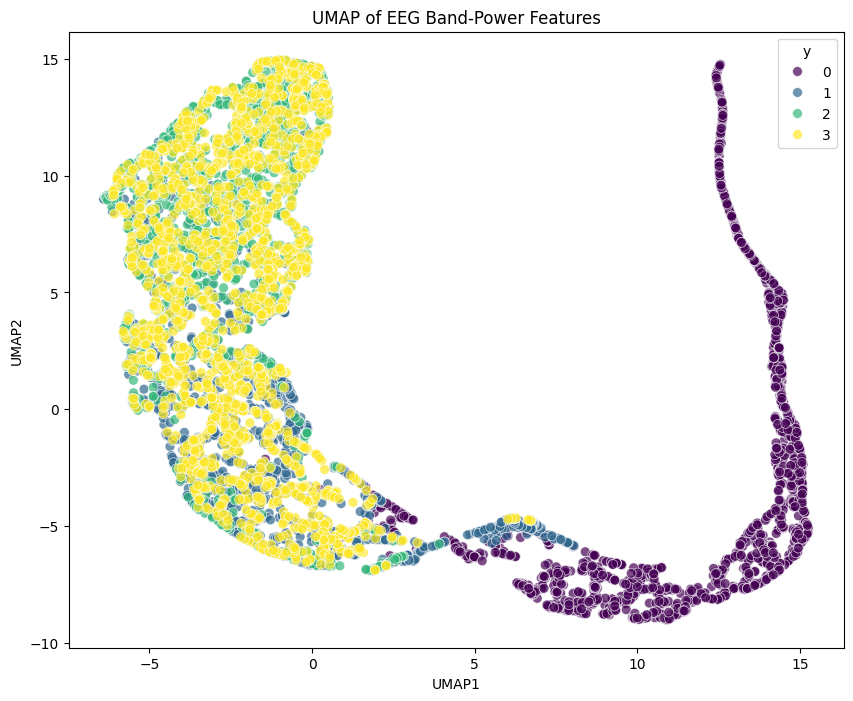

In [ ]:
import umap

# Initialize UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the band-power features
X_umap = umap_reducer.fit_transform(band_power_df)

# Create a new DataFrame for the UMAP embeddings
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

# Display the first few rows of the UMAP DataFrame
display(umap_df.head())

# Plot the UMAP embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue=y, palette='viridis', data=umap_df, s=50, alpha=0.7)
plt.title('UMAP of EEG Band-Power Features')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Split the UMAP data into training and testing sets
X_train_umap, X_test_umap, y_train_ada, y_test_ada = train_test_split(X_umap, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train_umap, y_train_ada)

# Evaluate the AdaBoost classifier
ada_pred = adaboost_clf.predict(X_test_umap)
print("AdaBoost Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_ada, ada_pred)}")
print(classification_report(y_test_ada, ada_pred))

AdaBoost Classifier Evaluation:
Accuracy: 0.609375
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       400
           1       0.50      0.73      0.59       400
           2       0.54      0.62      0.58       400
           3       0.38      0.13      0.19       400

    accuracy                           0.61      1600
   macro avg       0.58      0.61      0.58      1600
weighted avg       0.58      0.61      0.58      1600



In [ ]:
# Get the probability scores from the AdaBoost classifier for the entire dataset
adaboost_proba = adaboost_clf.predict_proba(X_umap)

# Create a DataFrame for the probability scores
proba_df = pd.DataFrame(adaboost_proba, columns=[f'Class_{i}_Prob' for i in range(4)])

# Display the first few rows of the probability scores DataFrame
display(proba_df.head())

,Class_0_Prob,Class_1_Prob,Class_2_Prob,Class_3_Prob
0,0.259027,0.257226,0.238681,0.245066
1,0.266551,0.241909,0.246059,0.245482
2,0.279827,0.243587,0.236770,0.239816
3,0.279798,0.246265,0.234146,0.239791
4,0.271961,0.246818,0.238340,0.242881


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2552 - loss: 1.3861 - val_accuracy: 0.4663 - val_loss: 1.3822
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3149 - loss: 1.3749 - val_accuracy: 0.5038 - val_loss: 1.3024
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4816 - loss: 1.2135 - val_accuracy: 0.5888 - val_loss: 0.9302
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5474 - loss: 0.9284 - val_accuracy: 0.4956 - val_loss: 0.9379
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5507 - loss: 0.8924 - val_accuracy: 0.6263 - val_loss: 0.8437
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5568 - loss: 0.8666 - val_accuracy: 0.5775 - val_loss: 0.8447
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5747 - loss: 0.8398 - val_accuracy: 0.5831 - val_loss: 0.8411
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5679 - loss: 0.8593 - val_accuracy: 

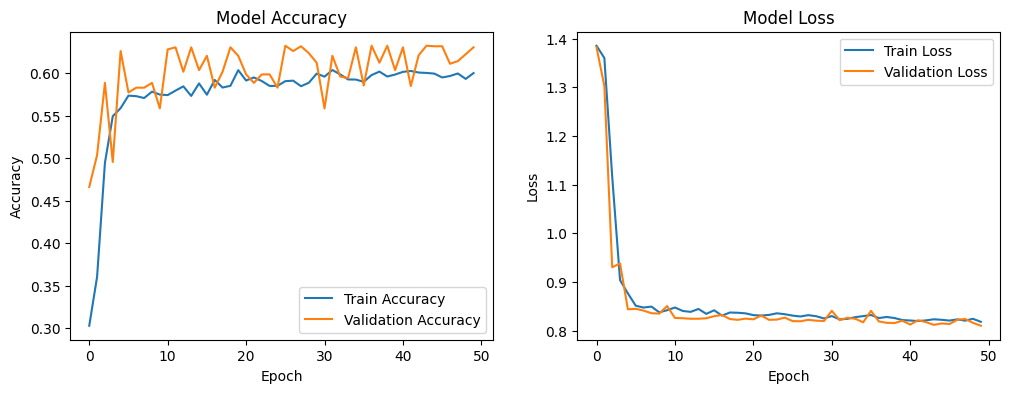

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data for the LSTM model
# We'll treat each epoch as a time step, so we need to create sequences
# For simplicity, we'll use a sequence length of 1, but this could be adjusted
X_lstm = proba_df.values.reshape((proba_df.shape[0], 1, proba_df.shape[1]))
y_lstm = y

# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42, stratify=y_lstm)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(100))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(4, activation='softmax'))

# Compile the model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\nLSTM Model Evaluation:")
print(f"Accuracy: {accuracy}")

# Make predictions
lstm_pred_prob = lstm_model.predict(X_test_lstm)
lstm_pred = np.argmax(lstm_pred_prob, axis=1)

# Print classification report
print(classification_report(y_test_lstm, lstm_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion

In this notebook, we explored two different approaches to classifying EEG signals for seizure detection.

**1. Single-Stage Models:**

*   We first trained three standard classification models: Logistic Regression, SVM, and Random Forest.
*   The **Random Forest model performed exceptionally well, achieving an accuracy of 96%**. This indicates that the raw EEG features are highly informative and can be effectively used for classification with a powerful ensemble model.

**2. Two-Stage Model with Feature Engineering:**

*   We then implemented a more complex, two-stage model that involved FFT feature extraction, UMAP dimensionality reduction, and an AdaBoost + LSTM pipeline.
*   This model achieved an accuracy of around 63%.

**Final Recommendation:**

While the two-stage model was an interesting exploration of more advanced techniques, the simpler **Random Forest model trained on the original EEG features is the recommended choice for this task**. It provides excellent performance with a much less complex implementation.

This project demonstrates the importance of starting with simpler models and then exploring more complex approaches if necessary. In this case, the simpler approach was the most effective.